In [1]:
import pandas as pd
import spacy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
import nltk
import random
nltk.download('stopwords')
!pip install -q wordcloud
from nltk import FreqDist
import wordcloud
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from IPython.core.display import Path
from mlxtend.plotting import plot_learning_curves
# !pip install -U spacy
import spacy
!python -m spacy download el_core_news_lg
# !pip install torch -q

import torch
import torch.nn as nn
import torch.nn.functional as fuctional
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torch.nn.functional as F
import optuna
import torch.optim as optim
from optuna.trial import TrialState
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip


from torch.autograd import Variable
from transformers import BertModel, BertTokenizer
from transformers import BertTokenizer, BertForSequenceClassification ,BertTokenizer , BertForMaskedLM
from transformers import DistilBertTokenizer, DistilBertModel , DistilBertForSequenceClassification
from torch.nn.functional import softmax

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.6/568.6 MB 2.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_lg')


In [2]:
nowords=[
   'μερα','γινομαι','θελω','λεγω', 'κανω','σε ο','αλλα', 'αντι', 'απο', 'αυτα', 'αυτες', 'αυτη', 'αυτο', 'αυτον', 'αυτοι', 'αυτος', 'αυτου', 'αυτων', 'δεν', 'δια', 'εαν', 'εγινε', 'εκανε',
         'ετσι', 'ειμαι', 'ειναι', 'ειχε', 'εκει', 'εξης', 'επι', 'επομενως', 'επισης', 'εσεις', 'εσενα', 'εσυ', 'ευχαριστω', 'εως', 'η', 'η', 'ηδη',
         'ηταν', 'θα', 'και', 'κατα', 'κατι', 'κατι', 'κι', 'κιολας', 'κοντα', 'κτλ.', 'μα', 'με', 'μεσα', 'μεχρι', 'μη', 'μην', 'μια', 'μου', 'μονο',
         'ναι', 'να', 'ναι', 'ναι', 'νομιζα', 'ξανα', 'ο', 'οι', 'ολα', 'ολα', 'οποια', 'οποιο', 'οποιος', 'οποιου', 'οποιων', 'οποιως', 'οτι', 'ουτε'
         , 'παλι', 'παντα', 'πανω', 'περι', 'πολλα', 'πολυ', 'που', 'προς', 'προτου', 'πως', 'σαν', 'σε', 'σεις', 'στη', 'στην', 'στης', 'στις', 'στο', 
         'στον', 'συν', 'τα', 'τη', 'την', 'της', 'τι', 'τιποτα', 'το', 'τον', 'τοσο', 'τοσο', 'του', 'τους', 'τουτο', 'τουτοι', 'τουτος', 'τουτου', 'τουτων',
         'τωρα', 'υπερ', 'υπο', 'υποψη', 'χωρις', 'ομως', 'τοτε', 'εκεινο', 'εκεινοι', 'εκεινος', 'εκεινου', 'εκεινων', 'εξαιρεση', 'ειδε', 'ειμαστε', 'ειστε', 'ειχα', 'ειχε', 'εκτος', 'εκτος', 'εξηγησε', 'εξακολουθει', 'εξηγει', 'εξηγησει', 'επιπλεον', 'επισημα', 'επισης', 'επομενο', 'επομενος', 'επομενως', 'επισης', 'επομενο', 'εργασια', 'ερωτησεις', 'εσεις', 'εσενα', 'εσυ', 'ευχαριστω', 'ευρω', 'εφοσον', 'ημερα', 'ημερες', 'ημερας', 'ηλικια', 'ηλικιας', 'ηλικιας', 'ημερομηνια', 'ημερομηνιας', 'ημερων', 'ημιτελης', 'ηδη', 'ηθελα', 'ηθελαν', 'ηθελαν', 'ηθελε', 'ηθελες', 'ηθελες', 'ηθελον', 'ηταν', 'αδιακοπα', 'αι', 'ακομα', 'ακομη', 'ακριβως', 'αληθεια', 'αληθινα', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'αν', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απ', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αργα', 'αργοτερο', 'αριστερα', 'αρκετα', 'αρχικα', 'ας', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γι', 'για', 'γρηγορα', 'γυρω', 'δα', 'δε', 'δεινα', 'δεν', 'δεξια', 'δηθεν', 'δηλαδη', 'δι', 'δια', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγκαιρα', 'εγκαιρως', 'εγω', 'εδω', 'ειδεμη', 'ειθε', 'ειμαι', 'ειμαστε', 'ειναι', 'εις', 'εισαι', 'εισαστε', 'ειστε', 'ειτε', 'ειχα', 'ειχαμε', 'ειχαν', 'ειχατε', 'ειχε', 'ειχες', 'εκαστα', 'εκαστες', 'εκαστη', 'εκαστην', 'εκαστης', 'εκαστο', 'εκαστοι', 'εκαστον', 'εκαστος', 'εκαστου', 'εκαστους', 'εκαστων', 'εκει', 'εκεινα', 'εκεινες', 'εκεινη', 'εκεινην', 'εκεινης', 'εκεινο', 'εκεινοι', 'εκεινον', 'εκεινος', 'εκεινου', 'εκεινους', 'εκεινων', 'εκτος', 'εμας', 'εμεις', 'εμενα', 'εμπρος', 'εν', 'ενα', 'εναν', 'ενας', 'ενος', 'εντελως', 'εντος', 'εντωμεταξυ', 'ενω', 'εξ', 'εξαφνα', 'εξης', 'εξισου', 'εξω', 'επανω', 'επειδη', 'επειτα', 'επι', 'επισης', 'επομενως', 'εσας', 'εσεις', 'εσενα', 'εστω', 'εσυ', 'ετερα', 'ετεραι', 'ετερας', 'ετερες', 'ετερη', 'ετερης', 'ετερο', 'ετεροι', 'ετερον', 'ετερος', 'ετερου', 'ετερους', 'ετερων', 'ετουτα', 'ετουτες', 'ετουτη', 'ετουτην', 'ετουτης', 'ετουτο', 'ετουτοι', 'ετουτον', 'ετουτος', 'ετουτου', 'ετουτους', 'ετουτων', 'ετσι', 'ευγε', 'ευθυς', 'ευτυχως', 'εφεξης', 'εχει', 'εχεις', 'εχετε', 'εχθες', 'εχομε', 'εχουμε', 'εχουν', 'εχτες', 'εχω', 'εως', 'η', 'ηδη', 'ημασταν', 'ημαστε', 'ημουν', 'ησασταν', 'ησαστε', 'ησουν', 'ηταν', 'ητανε', 'ητοι', 'ηττον', 'θα', 'ι', 'ιδια', 'ιδιαν', 'ιδιας', 'ιδιες', 'ιδιο', 'ιδιοι', 'ιδιον', 'ιδιος', 'ιδιου', 'ιδιους', 'ιδιων', 'ιδιως', 'ιι', 'ιιι', 'ισαμε', 'ισια', 'ισως', 'καθε', 'καθεμια', 'καθεμιας', 'καθενα', 'καθενας', 'καθενος', 'καθετι', 'καθολου', 'καθως', 'και', 'κακα', 'κακως', 'καλα', 'καλως', 'καμια', 'καμιαν', 'καμιας', 'καμποσα', 'καμποσες', 'καμποση', 'καμποσην', 'καμποσης', 'καμποσο', 'καμποσοι', 'καμποσον', 'καμποσος', 'καμποσου', 'καμποσους', 'καμποσων', 'κανεις', 'κανεν', 'κανενα', 'κανεναν', 'κανενας', 'κανενος', 'καποια', 'καποιαν', 'καποιας', 'καποιες', 'καποιο', 'καποιοι', 'καποιον', 'καποιος', 'καποιου', 'καποιους', 'καποιων', 'καποτε', 'καπου', 'καπως', 'κατ', 'κατα', 'κατι', 'κατιτι', 'κατοπιν', 'κατω', 'κιολας', 'κλπ', 'κοντα', 'κτλ', 'κυριως', 'λιγακι', 'λιγο', 'λιγωτερο', 'λογω', 'λοιπα', 'λοιπον', 'μα', 'μαζι', 'μακαρι', 'μακρυα', 'μαλιστα', 'μαλλον', 'μας', 'με', 'μεθαυριο', 'μειον', 'μελει', 'μελλεται', 'μεμιας', 'μεν', 'μερικα', 'μερικες', 'μερικοι', 'μερικους', 'μερικων', 'μεσα', 'μετ', 'μετα', 'μεταξυ', 'μεχρι', 'μη', 'μηδε', 'μην', 'μηπως', 'μητε', 'μια', 'μιαν', 'μιας', 'μολις', 'μολονοτι', 'μοναχα', 'μονες', 'μονη', 'μονην', 'μονης', 'μονο', 'μονοι', 'μονομιας', 'μονος', 'μονου', 'μονους', 'μονων', 'μου', 'μπορει', 'μπορουν', 'μπραβο', 'μπρος', 'να', 'ναι', 'νωρις', 'ξανα', 'ξαφνικα', 'ο', 'οι', 'ολα', 'ολες', 'ολη', 'ολην', 'ολης', 'ολο', 'ολογυρα', 'ολοι', 'ολον', 'ολονεν', 'ολος', 'ολοτελα', 'ολου', 'ολους', 'ολων', 'ολως', 'ολωσδιολου', 'ομως', 'οποια', 'οποιαδηποτε', 'οποιαν', 'οποιανδηποτε', 'οποιας', 'οποιασδηποτε', 'οποιδηποτε', 'οποιες', 'οποιεσδηποτε', 'οποιο', 'οποιοδηποτε', 'οποιοι', 'οποιον', 'οποιονδηποτε', 'οποιος', 'οποιοσδηποτε', 'οποιου', 'οποιουδηποτε', 'οποιους', 'οποιουσδηποτε', 'οποιων', 'οποιωνδηποτε', 'οποτε', 'οποτεδηποτε', 'οπου', 'οπουδηποτε', 'οπως', 'ορισμενα', 'ορισμενες', 'ορισμενων', 'ορισμενως', 'οσα', 'οσαδηποτε', 'οσες', 'οσεσδηποτε', 'οση', 'οσηδηποτε', 'οσην', 'οσηνδηποτε', 'οσης', 'οσησδηποτε', 'οσο', 'οσοδηποτε', 'οσοι', 'οσοιδηποτε', 'οσον', 'οσονδηποτε', 'οσος', 'οσοσδηποτε', 'οσου', 'οσουδηποτε', 'οσους', 'οσουσδηποτε', 'οσων', 'οσωνδηποτε', 'οταν', 'οτι', 'οτιδηποτε', 'οτου', 'ου', 'ουδε', 'ουτε', 'οχι', 'παλι', 'παντοτε', 'παντου', 'παντως', 'παρα', 'περα', 'περι', 'περιπου', 'περισσοτερο', 'περσι', 'περυσι', 'πια', 'πιθανον', 'πιο', 'πισω', 'πλαι', 'πλεον', 'πλην', 'ποια', 'ποιαν', 'ποιας', 'ποιες', 'ποιο', 'ποιοι', 'ποιον', 'ποιος', 'ποιου', 'ποιους', 'ποιων', 'πολυ', 'ποσες', 'ποση', 'ποσην', 'ποσης', 'ποσοι', 'ποσος', 'ποσους', 'ποτε', 'που', 'πουθε', 'πουθενα', 'πρεπει', 'πριν', 'προ', 'προκειμενου', 'προκειται', 'προπερσι', 'προς', 'προτου', 'προχθες', 'προχτες', 'πρωτυτερα', 'πως', 'σαν', 'σας', 'σε', 'σεις', 'σημερα', 'σιγα', 'σου', 'στα', 'στη', 'στην', 'στης', 'στις', 'στο', 'στον', 'στου', 'στους', 'στων', 'συγχρονως', 'συν', 'συναμα', 'συνεπως', 'συνηθως', 'συχνα', 'συχνας', 'συχνες', 'συχνη', 'συχνην', 'συχνης', 'συχνο', 'συχνοι', 'συχνον', 'συχνος', 'συχνου', 'συχνου', 'συχνους', 'συχνων', 'συχνως', 'σχεδον', 'σωστα', 'τα', 'ταδε', 'ταυτα', 'ταυτες', 'ταυτη', 'ταυτην', 'ταυτης', 'ταυτο', 'ταυτον', 'ταυτος', 'ταυτου', 'ταυτων', 'ταχα', 'ταχατε', 'τελικα', 'τελικως', 'τες', 'τετοια', 'τετοιαν', 'τετοιας', 'τετοιες', 'τετοιο', 'τετοιοι', 'τετοιον', 'τετοιος', 'τετοιου', 'τετοιους', 'τετοιων', 'τη', 'την', 'της', 'τι', 'τιποτα', 'τιποτε', 'τις', 'το', 'τοι', 'τον', 'τος', 'τοσα', 'τοσες', 'τοση', 'τοσην', 'τοσης', 'τοσο', 'τοσοι', 'τοσον', 'τοσος', 'τοσου', 'τοσους', 'τοσων', 'τοτε', 'του', 'τουλαχιστο', 'τουλαχιστον', 'τους', 'τουτα', 'τουτες', 'τουτη', 'τουτην', 'τουτης', 'τουτο', 'τουτοι', 'τουτοις', 'τουτον', 'τουτος', 'τουτου', 'τουτους', 'τουτων', 'τυχον', 'των', 'τωρα', 'υπ', 'υπερ', 'υπο', 'υποψη', 'υποψιν', 'υστερα', 'φετος', 'χαμηλα', 'χθες', 'χτες', 'χωρις', 'χωριστα', 'ψηλα', 'ω', 'ωραια', 'ως', 'ωσαν', 'ωσοτου', 'ωσπου', 'ωστε', 'ωστοσο', 'ωχ', 
          'ο', 'η', 'κ',  'εκλογες', 'δεν','γιατι', 'νεα','κανει','χρονια', 'ελλαδα', 'λεει','λεπω','λεμε','ειπα','ειπες','εβαλα','αδιακοπα','αι','ακομα','ακομη','ακριβως','αληθεια','αληθινα','αλλα','αλλαχου','αλλες','αλλη','αλλην','αλλης','αλλιως','αλλιωτικα','αλλο','αλλοι','αλλοιως','αλλοιωτικα','αλλον','αλλος','αλλοτε','αλλου','αλλους','αλλων','αμα','αμεσα','αμεσως','αν','ανα','αναμεσα','αναμεταξυ','ανευ','αντι','αντιπερα','αντις','ανω','ανωτερω','αξαφνα','απ','απεναντι','απο','αποψε','αρα','αραγε','αργα','αργοτερο','αριστερα','αρκετα','αρχικα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφοτου','αφου','βεβαια','βεβαιοτατα','γι','για','γρηγορα','γυρω','δα','δε','δεινα','δεν','δεξια','δηθεν','δηλαδη','δι','δια','διαρκως','δικα','δικο','δικοι','δικος','δικου','δικους','διολου','διπλα','διχως','εαν','εαυτο','εαυτον','εαυτου','εαυτους','εαυτων','εγκαιρα','εγκαιρως','εγω','εδω','ειδεμη','ειθε','ειμαι','ειμαστε','ειναι','εις','εισαι','εισαστε','ειστε','ειτε','ειχα','ειχαμε','ειχαν','ειχατε','ειχε','ειχες','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευγε','ευθυς','ευτυχως','εφεξης','εχει','εχεις','εχετε','εχθες','εχομε','εχουμε','εχουν','εχτες','εχω','εως','η','ηδη','ημασταν','ημαστε','ημουν','ησασταν','ησαστε','ησουν','ηταν','ητανε','ητοι','ηττον','θα','ι','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ιι','ιιι','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','κακα','κακως','καλα','καλως','καμια','καμιαν','καμιας','καμποσα','καμποσες','καμποση','καμποσην','καμποσης','καμποσο','καμποσοι','καμποσον','καμποσος','καμποσου','καμποσους','καμποσων','κανεις','κανεν','κανενα','κανεναν','κανενας','κανενος','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατα','κατι','κατιτι','κατοπιν','κατω','κιολας','κλπ','κοντα','κτλ','κυριως','λιγακι','λιγο','λιγωτερο','λογω','λοιπα','λοιπον','μα','μαζι','μακαρι','μακρυα','μαλιστα','μαλλον','μας','με','μεθαυριο','μειον','μελει','μελλεται','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μοναχα','μονες','μονη','μονην','μονης','μονο','μονοι','μονομιας','μονος','μονου','μονους','μονων','μου','μπορει','μπορουν','μπραβο','μπρος','να','ναι','νωρις','ξανα','ξαφνικα','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολογυρα','ολοι','ολον','ολονεν','ολος','ολοτελα','ολου','ολους','ολων','ολως','ολωςδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιαςδηποτε','οποιδηποτε','οποιες','οποιεςδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοςδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουςδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεςδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσηςδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοςδηποτε','οσου','οσουδηποτε','οσους','οσουςδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','οχι','παλι','παντοτε','παντου','παντως','παρα','περα','περι','περιπου','περισσοτερο','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολυ','ποσες','ποση','ποσην','ποσης','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειμενου','προκειται','προπερσι','προς','προτου','προχθες','προχτες','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συγχρονως','συν','συναμα','συνεπως','συνηθως','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο,ταυτον','ταυτος','ταυτου','ταυτων','ταχα','ταχατε','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','φετος','χαμηλα','χθες','χτες','χωρις','χωριστα','ψηλα','ω','ωραια','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ','ο','η','το','τα','τη','δηλαδη','μεχρι','γιατι','εχω','στους','μια','ένας','μία','κάποιος','κάποια','κάποιο','κάποιοι','αυτος','αυτη','αυτο','αυτοι','αυτες','αυτα','στο','στη','στα','για','με','απο','προς','ειναι','εχει','εχουν','θα','δεν','πανω','κατω','μεσα','εξω','κατω','ως','πανω','κατω','πιο','εδω','εκει','πολυ','λιγο','τωρα','ακομα','ομως','επισης','παντα','ακομη','πιθανως','μονο','οχι','ναι','ευχαριστως','γενικα','ολοι','ολες','ολα','ποιος','ποια','ποιο','ποιοι','ποιες','τιποτα','κανεις','καμια','κανενα','κανενες','αυτος','αυτη','αυτο','αυτοι','αυτες','αυτα','απο','σε','υπο','μετα','πριν','επειτα','αντι','εναν','μιαν','κανεναν','καμιαν','κανενα','καμια','μιαν','ενα','οποιος','οποια','οποιο','οποιοι','οποιες','οποιαν','οποιον','ολος','ολη','ολα','ολους','ολες','ολων','καθενας','καθεμια','καθενα','καθενες','ακομα','ενω','επομενως','συνεπως','επιπλεον','παρολα αυτα','παρ ολα αυτα','επισης','και','αλλα','αλλα και','αν','εαν','αν και','αντι','αντι να','αντι το','αντι τα','αντι του','αντι τη','αντι των','αντι στο','αντι στη','αντι στα','αντι στου','αντι στην','αντι στις','αντι στον','μεσω','τους','μας','ηταν','εκ','φορα','πρωτη','ειχα','εμεις','εσεις','ηδη','απ','εγινε','ειχε','αλλα','ουτε','ενας','εσας','αυτοι','αυτο','νεα','οντως','θελετε','κανει','σ','μας','πρεπε','ε','μαλιστα','τους','ηθελε','παω','εβαλε','λεει','γ','ν','θες','ερχεται','διαρκεια','θελουν','ασε','χ','λες','ξερω','α','δω','ειδε','μπηκε','βαλει','μερες','εφοσον','ενα','δυο','τρια','γινει','εργο','μιλαω','μιλησε','ποσα','ωρες','πρωινες','πρωτα','θελει','βαζω','εβαζε','εναντι','μπορεις','βρισκει','δει','μπορω','γινε','κανουν']


# nowords=[]
# greek_stopwords = stopwords.words('greek')
# nowords=greek_stopwords

# text editor gia kefalaia kai tonoys
 
nd = ['νδ', 'μητσοτακης', 'μητσοτακη', 'κυριακος', 'κουλης']
sy = ['τσιπρας', 'συριζα', 'αλεξη', 'συριζας', 'τσιπρα','αλεξης']

nlp = spacy.load("el_core_news_lg")



def lemmatize(text):
    doc = nlp(text)
    lemmas = []
    timer = 0
    for i, token in enumerate(doc):
        t = token.lemma_
        t = t.strip()
        t = t.translate(str.maketrans('άίέύόώή', 'αιευοωη'))
        if t not in nowords:
            if t in nd:
                lemmas.append('νδ')
            elif t == 'μητσοτακης':
                lemmas.append('νδ')
            elif t == 'τσιπρας':
                lemmas.append('συριζα')
            elif t in sy:
                lemmas.append('συριζα')
            elif (t == 'νεα' or t == 'νεος') and i + 1 < len(doc):
                if doc[i + 1] == 'δημοκρατια':
                    timer = 1
                    lemmas.append('νδ')
                else:
                    lemmas.append(t)
            elif timer == 0:
                lemmas.append(t)
            elif timer == 1:
                timer = 0
    return lemmas

def TextProccess(text):
    text =text.strip()
    return text

def PreProccessText(text):
    oldtext=nltk.word_tokenize(text)
    newtext=[]
    for t in oldtext:
        text=t.lower()
        newtext.append(TextProccess(text))
    return newtext

# take files
df = pd.read_csv("/kaggle/input/ys19-2023-assignment-4a/train_set.csv", index_col=False)
test_df = pd.read_csv("/kaggle/input/ys19-2023-assignment-4a/test_set.csv", index_col=False)
val_df = pd.read_csv("/kaggle/input/ys19-2023-assignment-4a/valid_set.csv", index_col=False)

#  metatropi bgazeis @,# kena ,links ktl ktl
test_df['Text']=test_df['Text'].apply(lambda r:re.sub(r'@', ' ', r))
test_df['Text']=test_df['Text'].apply(lambda r:re.sub(r'#', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'[^\w]', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'http\S', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'[0-9]', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'_',' ',r)) 
# test_df['Text'] =test_df['Text'].apply(lambda r:re.sub("\s\s+", ' ', r)) 
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'[a-zA-Z]',' ',r)) 
# test_df['Combined'] = test_df['party'] + test_df['sentiment']

val_df['Text']=val_df['Text'].apply(lambda r:re.sub(r'@', ' ', r))
val_df['Text']=val_df['Text'].apply(lambda r:re.sub(r'#', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'[^\w]', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'http\S', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'[0-9]', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'_',' ',r)) 
# val_df['Text'] =val_df['Text'].apply(lambda r:re.sub("\s\s+", ' ', r)) 
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'[a-zA-Z]',' ',r)) 
# val_df['Combined'] = val_df['party'] + val_df['sentiment']

# df['Combined'] = df['party'] + df['sentiment']
df['Text']=df['Text'].apply(lambda r:re.sub(r'@', ' ', r))
df['Text']=df['Text'].apply(lambda r:re.sub(r'#', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'[^\w]', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'http\S+', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'[0-9]', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'_',' ',r)) 
# df['Text'] = df['Text'].apply(lambda r:re.sub("\s\s+", ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'[a-zA-Z]',' ',r)) 
# metatrepis sentiment se numbers kai to idio gia to party
df['sentiment']=df.Sentiment.map({
    'POSITIVE':2,
    'NEUTRAL':1,
    'NEGATIVE':0  
})
df['party']=df.Party.map({
    'SYRIZA':1,
    'ND':2,
    'KKE':3,
    'PASOK':4,
    'DIEM':5,
    'ELL_LYSI':6        
})
test_df['party']=test_df.Party.map({
    'SYRIZA':1,
    'ND':2,
    'KKE':3,
    'PASOK':4,
    'DIEM':5,
    'ELL_LYSI':6       
})
val_df['party']=val_df.Party.map({
      'SYRIZA':1,
    'ND':2,
    'KKE':3,
    'PASOK':4,
    'DIEM':5,
    'ELL_LYSI':6      
})
val_df['sentiment']=val_df.Sentiment.map({
    'POSITIVE':2,
    'NEUTRAL':1,
    'NEGATIVE':0  
})


# perneis 90% ton test
# Text_train,Text_val,Sentiment_train,Sentiment_val,Party_test,Party_val= train_test_split(df['Text'] ,df['sentiment'],df['party'],random_state=1000 , test_size=0.1,stratify=df.sentiment,shuffle=True)
Text_train=df['Text'] 
Text_val=val_df['Text']
Sentiment_train=df['sentiment'] 
Sentiment_val=val_df['sentiment'] 
Text_sub=test_df['Text']
# metatrepis ta text
Tweets=[]
for text in Text_train:
    we=lemmatize(" ".join(PreProccessText(text)))
    Tweets.append(we)

Tweets_test=[]
for text in Text_val:
    we=lemmatize(" ".join(PreProccessText(text)))
    Tweets_test.append(we)   

Tweets_sub=[]
for text in Text_sub:
    we=lemmatize(" ".join(PreProccessText(text)))
    Tweets_sub.append(we)   

    



dict_keys(['συριζα', 'νδ', 'κκε', 'εκλογη', 'νεος', 'σκαι', 'πασοκ', 'κιναλ', 'συνεντευξη', 'χρονος', 'δημοκρατια', 'κυβερνηση', 'τελος', 'ψηφιζω', 'χωρα', 'λαος', 'κομμα', 'γεννηματα', 'Ελλαδα', 'ξεφτιλες'])


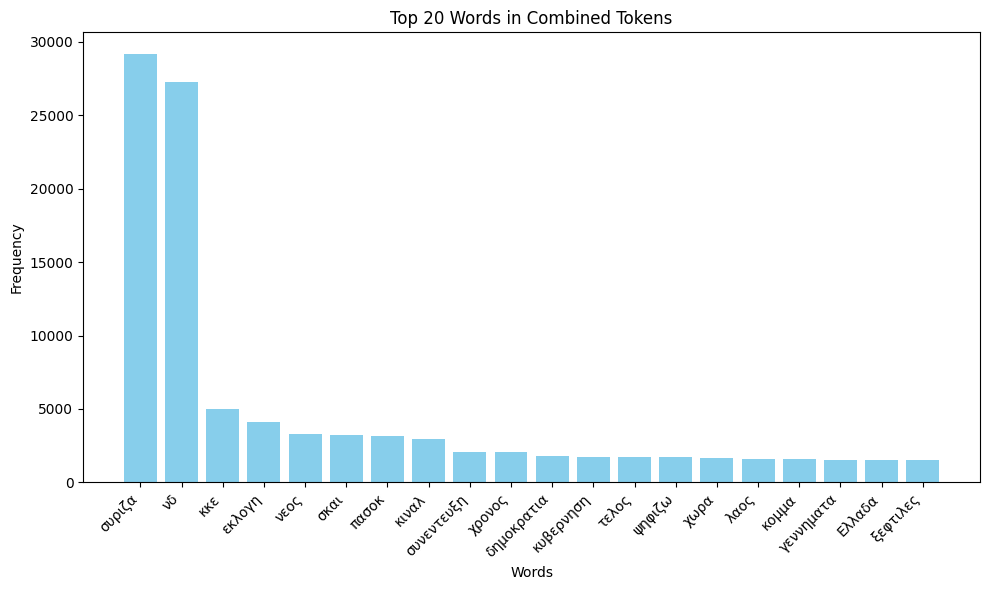

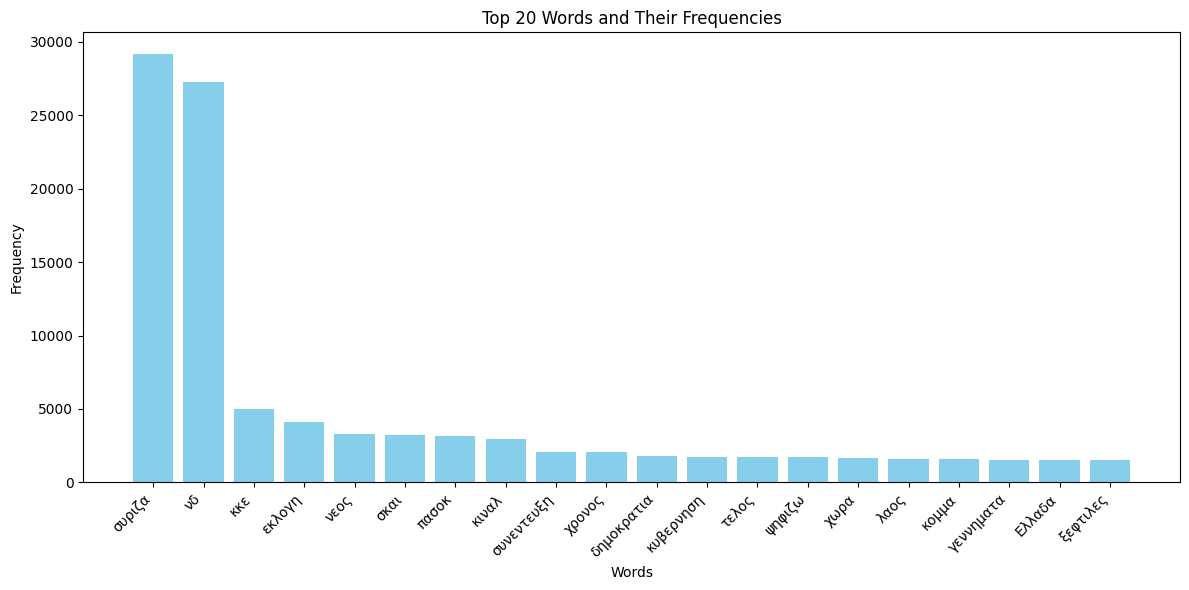

In [3]:
all_tokens = [token for sublist in Tweets for token in sublist]
all_tokens2 = [token for sublist in Tweets_test for token in sublist]
all_tokens3 = [token for sublist in Tweets_sub for token in sublist]
# Create a frequency distribution
all_tok=all_tokens+all_tokens2+all_tokens3

top_n = 20
word_freq_combined = Counter(all_tok)
top_words_combined = dict(word_freq_combined.most_common(top_n))


print(top_words_combined.keys())

plt.figure(figsize=(10, 6))
plt.bar(top_words_combined.keys(), top_words_combined.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words in Combined Tokens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# για συνχωτιτα

freq_dist = FreqDist(all_tok)
top_n = 20  # Change this value as needed
top_words = dict(freq_dist.most_common(top_n))

plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
Tweets_train=[]

for text in Tweets:
    if not text:
        text.append('κενο')
    text=set(text)
    marked_text = "[CLS] " + " ".join(text) + " [SEP]"
    Tweets_train.append(marked_text)
    
Tweets_val=[]
for text in Tweets_test:
    if not text:
        text.append('κενο')
    text=set(text)
    marked_text = "[CLS] " + " ".join(text) + " [SEP]"
    Tweets_val.append(marked_text)
    
Tweets_to_test=[]

for text in Tweets_sub:
    if not text:
        text.append('κενο')
    text=set(text)
    marked_text = "[CLS] " + " ".join(text) + " [SEP]"
    Tweets_to_test.append(marked_text)   

In [5]:
test_torch=Tweets_train[:]
test_val=Tweets_val[:]
test_test=Tweets_to_test[:]


In [6]:

# edo ta kano se tensor type


# einai h diafora ama htan ena vector me athrisma h meso oro enantion padding poy tha exei p.x 50 lexeis ara w*100
inp=100

In [7]:
# DistilBertModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
# .pooler_output
# .last_hidden_state
class NEW_Model2(nn.Module): 
    def __init__(self, inside, h1,h2, out): 
        super(NEW_Model2, self).__init__() 
        self.bert = BertModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
        self.fc = nn.Linear(768, out)

    def forward(self, input_ids, attention_mask):
#         print("Input IDs shape:", input_ids.shape)
#         print("Attention mask shape:", attention_mask.shape)
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        y = self.fc(pooled_output)
        return y


In [8]:
import random

class CustomDataset(Dataset): 
    def __init__(self, text, sent, tok):
        self.TEXT = []
        self.SENT = []
        self.tokenizer = tok
        
        word_lengths = [len(word) for sentence in text for word in sentence.split()]
        average_length = sum(word_lengths) / len(word_lengths)
        
        for (x, y) in zip(text, sent):
            encoded_text = self.tokenizer.encode_plus(x, padding='max_length', truncation=True, max_length=int(average_length), return_tensors='pt', return_token_type_ids=False, return_attention_mask=True)
            self.TEXT.append(encoded_text)
            self.SENT.append(torch.tensor(y, dtype=torch.long))

    def __len__(self):
        return len(self.SENT)

    def __getitem__(self, index):
        return (self.TEXT[index]['input_ids'].squeeze(), self.TEXT[index]['attention_mask'].squeeze(), self.SENT[index])
    
class CustomDataset2(Dataset): 
    def __init__(self,text, tok):
        self.TEXT = []
        self.tokenizer = tok
        word_lengths = [len(word) for sentence in text for word in sentence.split()]
        average_length = sum(word_lengths) / len(word_lengths)
        
        for x in text:
            encoded_text = self.tokenizer.encode_plus(x, padding='max_length', truncation=True, max_length=int(average_length), return_tensors='pt', return_token_type_ids=False, return_attention_mask=True)
            self.TEXT.append(encoded_text)
    def __len__(self):
        return len(self.TEXT)

    def __getitem__(self, index):
        return (self.TEXT[index]['input_ids'].squeeze(), self.TEXT[index]['attention_mask'].squeeze())    


In [9]:
YW=torch.LongTensor(Sentiment_train.values)

SV=torch.LongTensor(Sentiment_val.values)

In [10]:
# tokenizer2 = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# model2 = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# results = []

# for text in test_torch:

#     inputs = tokenizer2(text, return_tensors="pt")

#     outputs = model2(**inputs)

#     predicted_class_idx = torch.argmax(outputs.logits)
#     if predicted_class_idx == 1:
#         predicted_class = 2
#     elif  predicted_class_idx == 0:
#         predicted_class = 0
#     else:
#         predicted_class = 1

#     results.append(predicted_class)

In [11]:

# ad=0
# for i, text in enumerate(test_torch):
#     if i<20:
#         print("Το συναίσθημα του κειμένου", i+1, "είναι:", results[i],YW[i],"το text ειναι",text)
#     if results[i]==YW[i]:
#         ad=ad+1

# print(ad,len(YW),ad/len(YW)*100)

In [12]:
tokenizer = BertTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
# tokenizer = DistilBertTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

val_data = CustomDataset(test_val,Sentiment_train.values,tokenizer)
# val_data = val_data.squeeze()
test_data = CustomDataset(test_torch,Sentiment_val.values,tokenizer)
# test_data = test_data.squeeze()
test_testd=CustomDataset2(test_test,tokenizer)
# test_testd = test_testd.squeeze()

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/530k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

In [13]:
def objective(trial):
#     100 -> 500
    lr = trial.suggest_float('lr', 0.01, 0.01)
    number_trials =trial.suggest_int('number_trials',0 ,50)
    loss_toll=trial.suggest_int('loss_toll',1 ,5)
    optimizer_name= trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    h1 = trial.suggest_int('h1',3,80)
    h2 = trial.suggest_int('h2',3,50)
    bs = trial.suggest_int('bs',10,50)
    torch.manual_seed(69)
    random.seed(69)
    class_counts = Counter(YW.numpy())
    class_weights = [1.0 / class_counts[class_index] for class_index in range(len(class_counts))]
    sampler = WeightedRandomSampler(weights=class_weights, num_samples=len(test_data), replacement=True)
    dataloader = DataLoader(test_data, batch_size=bs)
    cr=nn.CrossEntropyLoss()
    mod = NEW_Model2(inp,h1,h2,3)
    opt = getattr(optim, optimizer_name)(mod.parameters(), lr=lr)
    best_loss=10
    tolls=0
    for i in range(number_trials):
        
        for text1,text2,sent in dataloader:
            y_pred = mod(text1,text2)   
            l=cr(y_pred,sent)
            if l<best_loss:
                tolls=0
                best_loss=l
            else:
                tolls=tolls+1
            if tolls>loss_toll:
                break
            opt.zero_grad()
            l.backward()
            opt.step()
    
    
#     epsilon = 1e-7
    epsilon = 0
    correct_counts = [epsilon, epsilon, epsilon]
    with torch.no_grad():
        for data1,data2,sent in val_data:
            data1 = data1.unsqueeze(0)
            data2 = data2.unsqueeze(0)
            y_val=mod.forward(data1,data2)
            if y_val.argmax().item()==sent:
                correct_counts[SV[i]]+=1
    total_correct = sum(correct_counts)            
    correct_counts[0] = (correct_counts[0] / len(SV)) * 100
    correct_counts[1] = (correct_counts[1] / len(SV)) * 100
    correct_counts[2] = (correct_counts[2] / len(SV)) * 100
    print(correct_counts)
    return (total_correct/ len(SV)) * 100
# nn.Parameter
## dataset=torch.utils.data.TensorDataset(test_data, YW)
# optuna_sample=optuna.create_study(direction='maximize')
# optuna_sample.optimize(objective, n_trials=20)

In [14]:
# print(len(optuna_sample.trials))
# print(optuna_sample.best_trial)
# print(optuna_sample.best_params)
# best=optuna_sample.best_params

best_lr= 0.01
best_number_trials= 47
best_toll= 3
best_optimizer= 'RMSprop'
best_h1= 63 
best_h2= 49
best_bs=37

# best_lr=best['lr']
# best_number_trials=best['number_trials']
# best_toll=best['loss_toll']
# best_optimizer=best['optimizer']
# best_h1=best['h1']
# best_h2=best['h2']
# best_bs=best['bs']


In [21]:
torch.manual_seed(69)
random.seed(69)
mod = NEW_Model2(inp,best_h1,best_h2,3)
cr=nn.CrossEntropyLoss()
opt=opt = getattr(optim, best_optimizer)(mod.parameters(),lr=best_lr)
runs=best_number_trials # or epochs
lossq=[]
class_counts = Counter(YW.numpy())
class_weights = [1.0 / class_counts[class_index] for class_index in range(len(class_counts))]
sampler = WeightedRandomSampler(weights=class_weights, num_samples=len(test_data), replacement=True)
dataloader = DataLoader(test_data, batch_size=best_bs, sampler=sampler)
loss=10
tolls=0
# text = test_data
# sent = YW
for i in range(runs): 
        j=0
        for text1,text2,sent in dataloader:
            y_pred = mod(text1,text2)   
            l=cr(y_pred,sent)
            lossq.append(l.detach().numpy())
            if i%10==0 and j==0:
                j=j+1
                print(i)
            if l<loss:
                tolls=0
                best_loss=l
            else:
                tolls=tolls+1
            if tolls>best_toll:
                break
            opt.zero_grad()
            l.backward()
            opt.step()
    
    
Y_all=[]
epsilon = 0
correct_counts = [epsilon, epsilon, epsilon]
with torch.no_grad():
    for data1,data2,sent in val_data:
        data1 = data1.unsqueeze(0)
        data2 = data2.unsqueeze(0)
        y_val=mod.forward(data1,data2)
        if y_val.argmax().item()==sent:
            correct_counts[SV[i]]+=1
        Y_all.append(y_val.argmax().item())
            
total_correct = sum(correct_counts)            
correct_counts[0] = (correct_counts[0] / len(SV)) * 100
correct_counts[1] = (correct_counts[1] / len(SV)) * 100
correct_counts[2] = (correct_counts[2] / len(SV)) * 100
print(correct_counts)

# print(classification_report(Sentiment_val,Y_all))

0
10
20
30
40
[34.21253822629969, 0.0, 0.0]


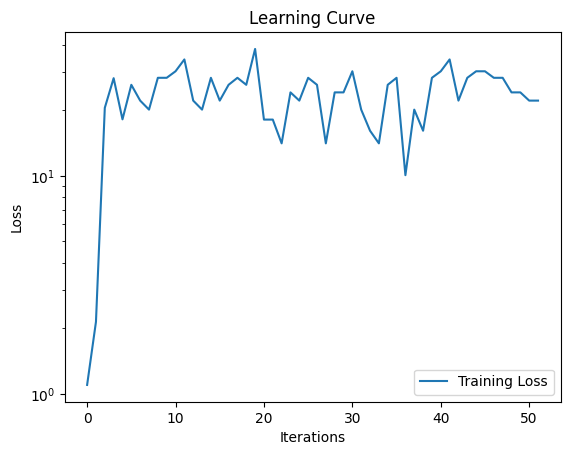

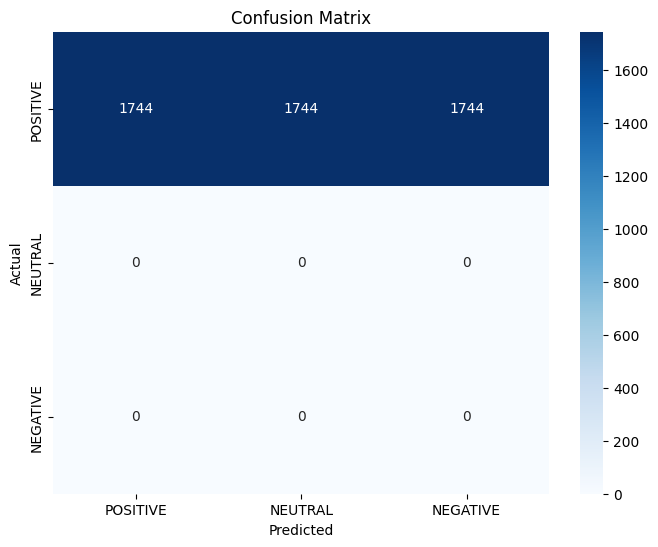

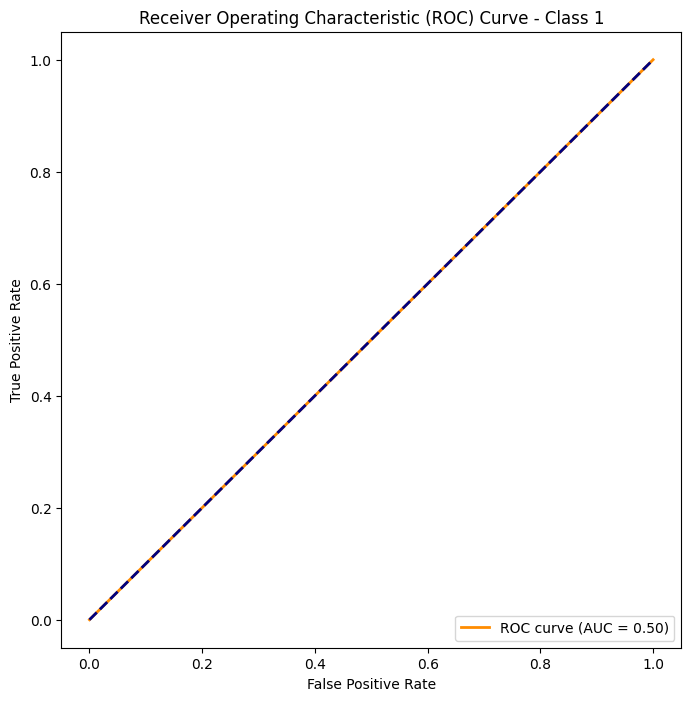

AUC: 0.50


In [22]:
# print learning curve
plt.semilogy(range(len(lossq)), lossq, label='Training Loss')
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


# print confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_all, Sentiment_val)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE','NEUTRAL', 'NEGATIVE'], yticklabels=['POSITIVE','NEUTRAL', 'NEGATIVE'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# print roc_curve
def custom_roc_curve(y_true, y_scores, class_index=1, plot=True):
    binary_y_true = (y_true == class_index).astype(int)
    fpr_values, tpr_values, thresholds = roc_curve(binary_y_true, y_scores)
    roc_auc = auc(fpr_values, tpr_values)

    if plot:
        plt.figure(figsize=(8, 8))
        plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - Class {class_index}')
        plt.legend(loc='lower right')
        plt.show()

    return fpr_values, tpr_values, roc_auc
from sklearn.metrics import  auc
# Example usage for binary classification problem (class_index=1)
fpr_custom, tpr_custom, roc_auc_custom = custom_roc_curve(Sentiment_val, Y_all, class_index=1)
print(f"AUC: {roc_auc_custom:.2f}")

In [20]:
SUB=[]
  
with torch.no_grad():
    for data1,data2 in test_testd:
        data1 = data1.unsqueeze(0)
        data2 = data2.unsqueeze(0)
        y_test=mod.forward(data1,data2)
        SUB.append(y_test.argmax().item())        

pred=[]
for pe in SUB:
    if pe==1:
        pred.append('NEUTRAL')
    if pe==2:
        pred.append('POSITIVE')     
    if pe==0:
        pred.append('NEGATIVE') 

data = pd.Series(pred)
SUB=test_df[['New_ID']]
SUB.rename(columns = {'New_ID':'Id'}, inplace = True)
SUB["Predicted"]=data
SUB.to_csv("submission.csv",index=None)

/tmp/ipykernel_33/3369119163.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUB.rename(columns = {'New_ID':'Id'}, inplace = True)
/tmp/ipykernel_33/3369119163.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SUB["Predicted"]=data
